In [3]:
library(reticulate)
py_run_string("")
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")
library(Matrix)

Loading combined annotation: annot


In [2]:
head(sample_sheet)

Quality,Order,run status,Note,date,run_pipeline,Channel Name,sampleid,condition,replicate,Lane,Index,cancer,site,reference,chemistry,flowcell,seq_dir,mode,min_umis,min_genes,percent_mito,expected_cells,total_droplets,z_dim,z_layers,channel_id,channel_id_match
<chr>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
,1,done3,,2018_07_29,FALSE,0300630_T2_LD,HTAPP-254-SMP-571,LD,channel1,4-Jan,SI-GA-D6,breast,axillary lymph node,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,2000,30000,200,1000,HTAPP-254-SMP-571_LD_channel1,HTAPP-254-SMP-571-LD-channel1
,2,done3,,2018_07_29,FALSE,0300630_T2_CDD,HTAPP-254-SMP-571,CDD,channel2,4-Jan,SI-GA-E6,breast,axillary lymph node,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,2000,30000,200,1000,HTAPP-254-SMP-571_CDD_channel2,HTAPP-254-SMP-571-CDD-channel2
,3,done3,,2018_07_29,FALSE,0300553_T2_1,HTAPP-806-SMP-6800,fresh,channel1,4-Jan,SI-GA-D3,breast,left breast,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,100,10000,200,1000,HTAPP-806-SMP-6800_fresh_channel1,HTAPP-806-SMP-6800-fresh-channel1
,4,done3,,2018_07_29,FALSE,0300553_T2_2,HTAPP-806-SMP-6800,fresh,channel2,4-Jan,SI-GA-E3,breast,left breast,GRCh38_v3.0.0,threeprime,HCMKLBGX7,/tmp/fc_tmp/180720_NB501337_0482_AHCMKLBGX7,V2,0,0,60,100,10000,200,1000,HTAPP-806-SMP-6800_fresh_channel2,HTAPP-806-SMP-6800-fresh-channel2
,5,done3,,2018_08_29,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel1,2,SI-GA-A7,breast,liver,GRCh38_v3.0.0,threeprime,HLNCMCCXY,/tmp/fc_tmp/180810_SL-HXQ_0624_AFCHLNCMCCXY,V2,0,0,60,2000,30000,200,1000,HTAPP-285-SMP-751_fresh_channel1,HTAPP-285-SMP-751-fresh-channel1
,6,done3,,2018_08_29,FALSE,0300782_T1,HTAPP-285-SMP-751,fresh,channel2,2,SI-GA-B7,breast,liver,GRCh38_v3.0.0,threeprime,HLNCMCCXY,/tmp/fc_tmp/180810_SL-HXQ_0624_AFCHLNCMCCXY,V2,0,0,60,2000,30000,200,1000,HTAPP-285-SMP-751_fresh_channel2,HTAPP-285-SMP-751-fresh-channel2


In [4]:
#samples=c(unique(annot$sampleid),paste0(unique(annot[condition%in%c("CST","NST","TST")]$sampleid),"_200"))
#samples=c(unique(sample_sheet[date%in%c("2019_10_01")]$sampleid))
samples=c(unique(sample_sheet$sampleid))
cat(samples)

HTAPP-254-SMP-571 HTAPP-806-SMP-6800 HTAPP-285-SMP-751 HTAPP-309-SMP-871 HTAPP-364-SMP-1321 HTAPP-423-SMP-1741 HTAPP-425-SMP-1771 HTAPP-382-SMP-1441 HTAPP-394-SMP-1561 HTAPP-414-SMP-1681 HTAPP-562-SMP-2581 HTAPP-589-SMP-2851 HTAPP-600-SMP-2941 HTAPP-735-SMP-3841 HTAPP-745-SMP-3961 HTAPP-749-SMP-3991 HTAPP-752-SMP-4051 HTAPP-783-SMP-4081 HTAPP-851-SMP-4351 HTAPP-321-SMP-1021 HTAPP-917-SMP-4531 HTAPP-963-SMP-4741 HTAPP-853-SMP-4381 HTAPP-313-SMP-932 HTAPP-262-SMP-602 HTAPP-330-SMP-1082 HTAPP-211-SMP-6751 HTAPP-213-SMP-6752 HTAPP-214-SMP-6753 HTAPP-611-SMP-3062 HTAPP-519-SMP-6762 HTAPP-521-SMP-6763 HTAPP-525-SMP-6765 HTAPP-887-SMP-7250 HTAPP-after-SMP-iso HTAPP-before-SMP-iso HTAPP-516-SMP-6761 HTAPP-662-SMP-3602 HTAPP-225-SMP-6756 HTAPP-627-SMP-3242 HTAPP-649-SMP-3422 HTAPP-231-SMP-6758 HTAPP-232-SMP-6759 HTAPP-514-SMP-6760 HTAPP-226-SMP-6757 HTAPP-908-SMP-4412 HTAPP-223-SMP-6755 HTAPP-223-SMP-7537 HTAPP-806-SMP-6789 HTAPP-814-SMP-6879 HTAPP-862-SMP-7059 HTAPP-862-SMP-7060 HTAPP-880-SMP-

In [ ]:
for (sample in grep("HTAPP-214-SMP-6753|SMP-iso",samples,invert = TRUE,value = TRUE)){
    print(sample)
    
    
    
    conds=unique(sample_sheet[sampleid==sample]$channel_id_match)
    scrub_dir=file.path(analysisDir,"00_scrublet",sample)
    dir.create(scrub_dir,recursive = TRUE,showWarnings = FALSE)
    all_ds=data.table()
    all_ed=data.table()
    
    if (file.exists(file.path(scrub_dir,"doublet_scores.tsv"))){
        next
    }
    
    #scrublet
    print("scrublet")
        simpleCache(cacheName = sample,cacheDir = cacheDir,cacheSubDir = "filtered",assignToVariable = "ss")
    for (cond in conds){    
        data_sub=GetAssayData(subset(ss,subset = orig.ident == cond), slot = "counts")
        writeMM(data_sub,file = file.path(scrub_dir,"rd.mtx") )
        ncells=ncol(data_sub)
        exp_rate=(ncells/1000)*0.01
        py_run_string(paste0("
from matplotlib import pyplot
pyplot.switch_backend('agg')
import scrublet as scr
import scipy.io
import sys
counts_matrix = scipy.io.mmread('",scrub_dir,"/rd.mtx').T.tocsc()
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=",exp_rate,",sim_doublet_ratio=5)
sys.stdout=open('",scrub_dir,"/",cond,"_out.txt','w')
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                           min_cells=3,
                                                           min_gene_variability_pctl=85,
                                                           n_prin_comps=30)
#sys.stdout.close()
pl=scrub.plot_histogram()
pl[0].savefig('",scrub_dir,"/",cond,"_plot.png')
"))
        ds=data.table(cellid = colnames(data_sub),doublet_scores=py$doublet_scores,is.doublet=py$predicted_doublets)
        ds[,ident:=cond,]
        all_ds=rbindlist(list(all_ds,ds))
        }
        
    write.table(all_ds,file.path(scrub_dir,"doublet_scores.tsv"),sep="\t",row.names = FALSE,quote=FALSE)
    file.remove(file.path(scrub_dir,"rd.mtx"))
    
    rm(ss)
    rm(data_sub)
    gc()
}

### Display qc plots

In [4]:
library(png)
library(cowplot)
library(magick)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Linking to ImageMagick 7.0.9.17
Enabled features: cairo, fontconfig, freetype, fftw, pango, rsvg, webp, x11
Disabled features: ghostscript, lcms


In [26]:
img_list=list()
for (sample in sort(grep("HTAPP-214-SMP-6753|SMP-iso",samples,invert = TRUE,value = TRUE))){
    print(sample)
    
    conds=unique(sample_sheet[sampleid==sample]$channel_id_match)
    scrub_dir=file.path(analysisDir,"00_scrublet",sample)
    for (cond in conds){   
#    img <- readPNG(paste0(scrub_dir,"/",cond,"_plot.png"))
 #   img = grid::rasterGrob(img,name=cond)
    img_list[[cond]]= ggdraw() + draw_image(paste0(scrub_dir,"/",cond,"_plot.png"))
    }
}

[1] "HTAPP-211-SMP-6751"
[1] "HTAPP-213-SMP-6752"
[1] "HTAPP-223-SMP-6755"
[1] "HTAPP-223-SMP-7537"
[1] "HTAPP-225-SMP-6756"
[1] "HTAPP-226-SMP-6757"
[1] "HTAPP-231-SMP-6758"
[1] "HTAPP-232-SMP-6759"
[1] "HTAPP-254-SMP-571"
[1] "HTAPP-262-SMP-602"
[1] "HTAPP-262-SMP-610"
[1] "HTAPP-285-SMP-751"
[1] "HTAPP-309-SMP-871"
[1] "HTAPP-313-SMP-932"
[1] "HTAPP-321-SMP-1021"
[1] "HTAPP-330-SMP-1082"
[1] "HTAPP-364-SMP-1321"
[1] "HTAPP-382-SMP-1441"
[1] "HTAPP-394-SMP-1561"
[1] "HTAPP-414-SMP-1681"
[1] "HTAPP-423-SMP-1741"
[1] "HTAPP-425-SMP-1771"
[1] "HTAPP-514-SMP-6760"
[1] "HTAPP-516-SMP-6761"
[1] "HTAPP-519-SMP-6762"
[1] "HTAPP-521-SMP-6763"
[1] "HTAPP-525-SMP-6765"
[1] "HTAPP-562-SMP-2581"
[1] "HTAPP-586-SMP-8599"
[1] "HTAPP-589-SMP-2851"
[1] "HTAPP-589-SMP-2860"
[1] "HTAPP-600-SMP-2941"
[1] "HTAPP-611-SMP-3062"
[1] "HTAPP-627-SMP-3242"
[1] "HTAPP-649-SMP-3422"
[1] "HTAPP-662-SMP-3602"
[1] "HTAPP-735-SMP-3841"
[1] "HTAPP-745-SMP-3961"
[1] "HTAPP-749-SMP-3991"
[1] "HTAPP-752-SMP-4051"
[1] "H

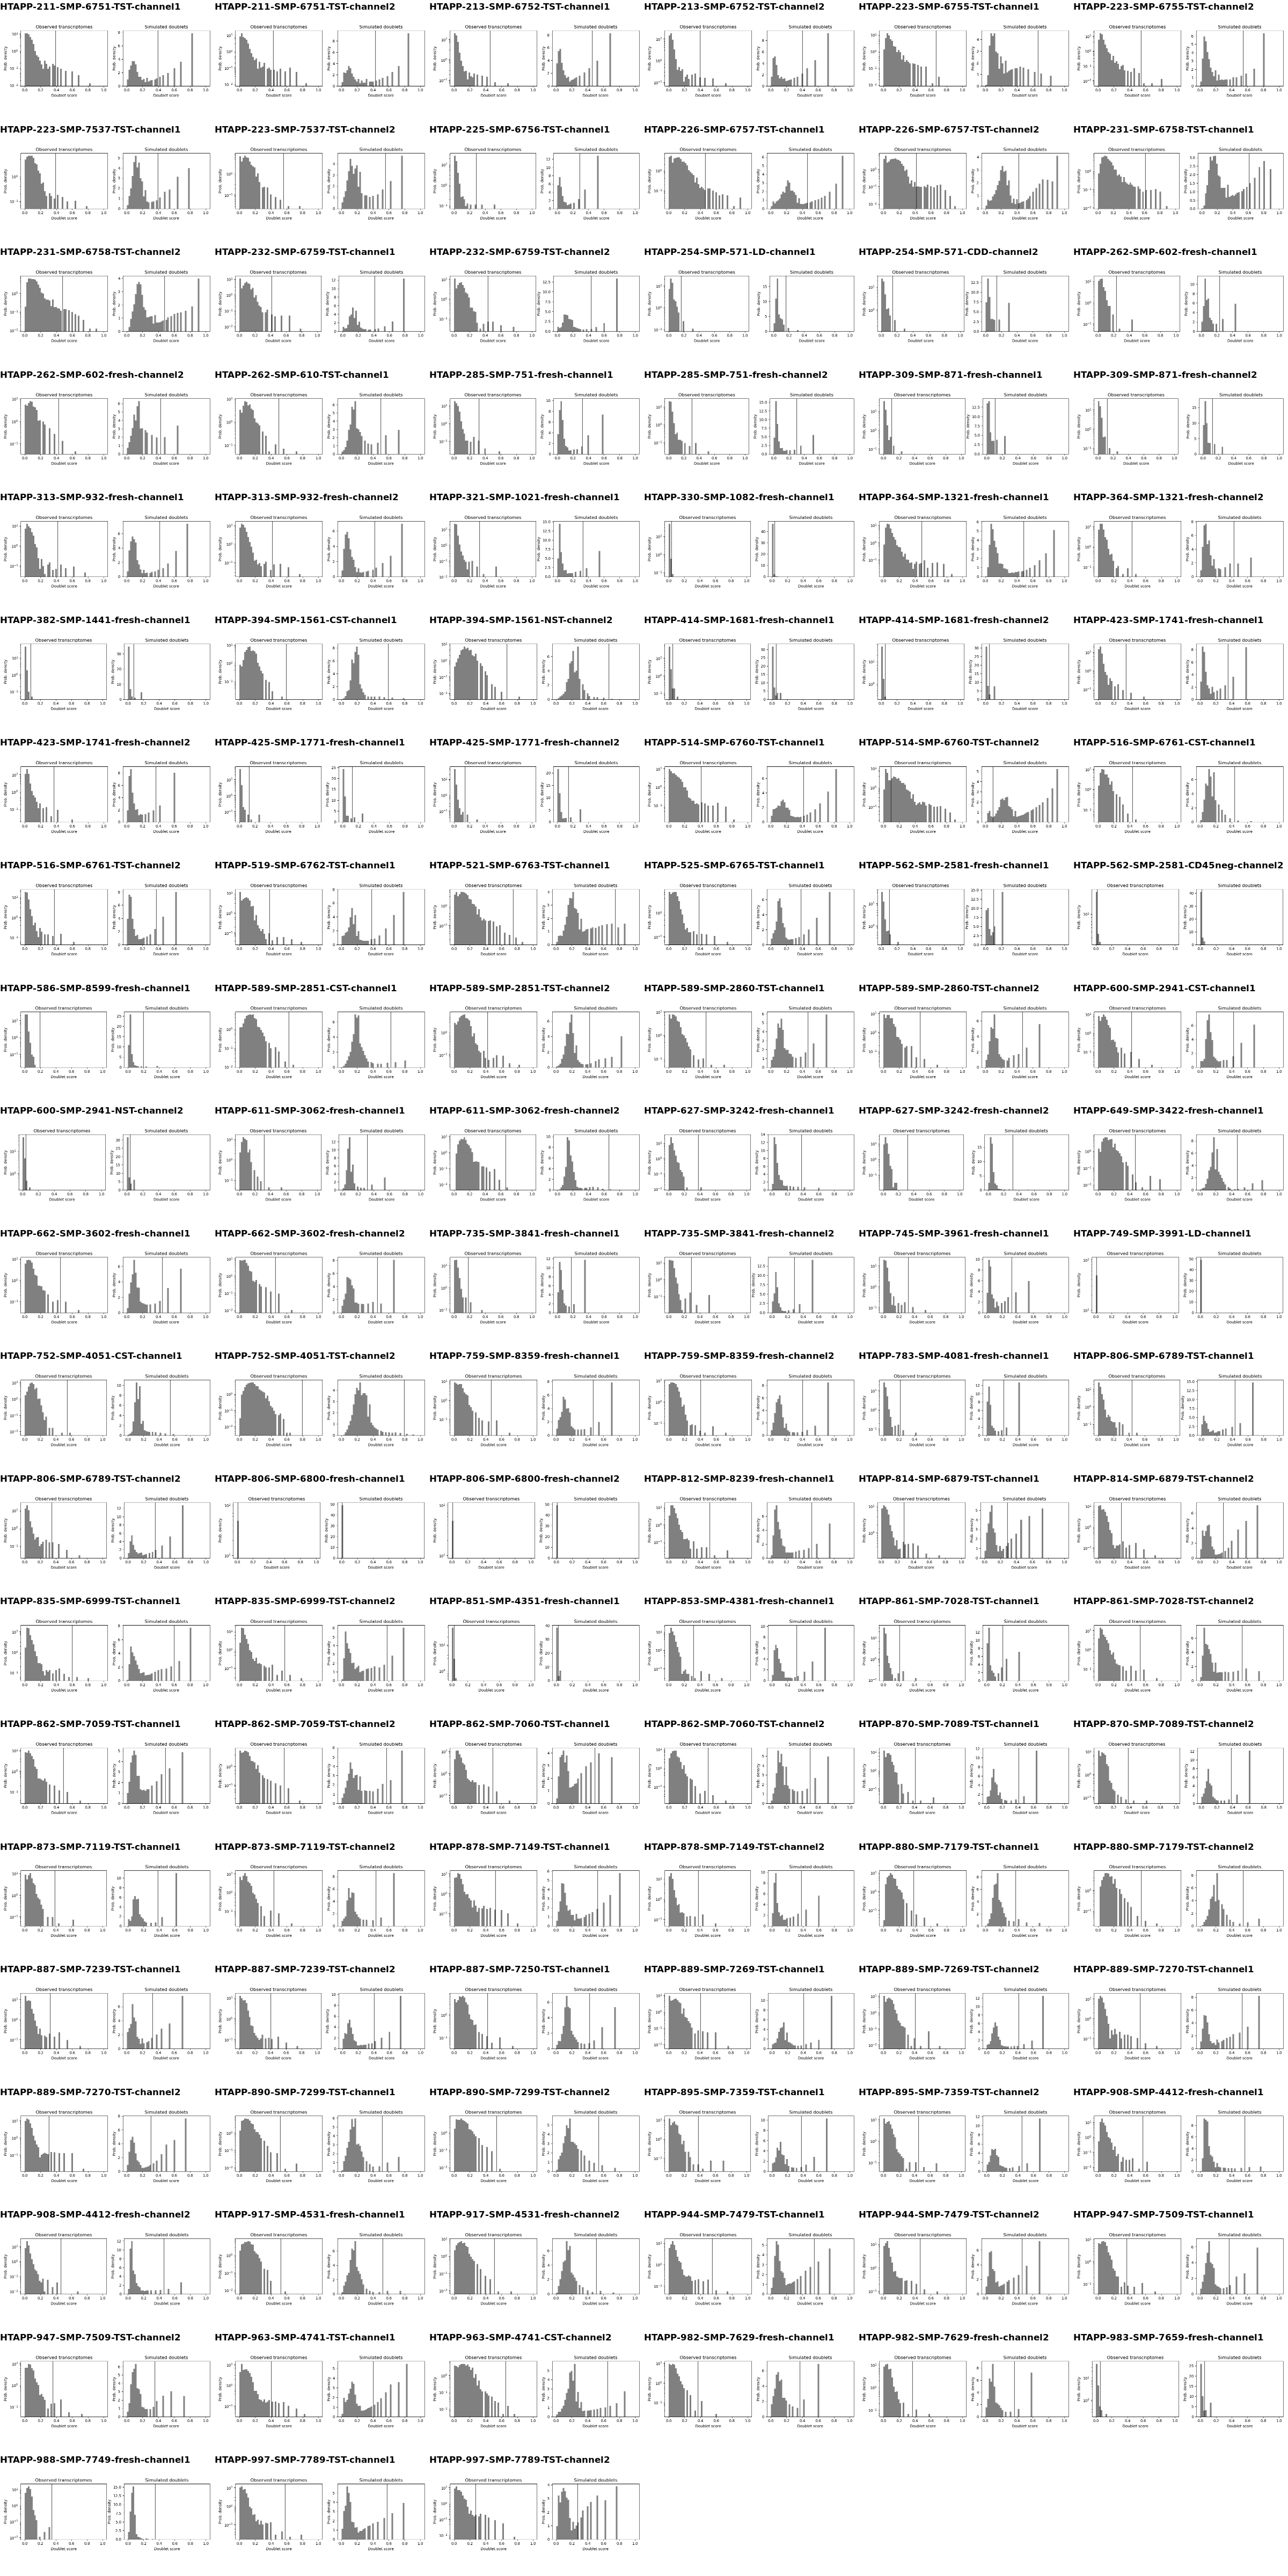

In [31]:
options(repr.plot.width = 20, repr.plot.height =40)
plot_grid(plotlist = img_list,labels = names(img_list),label_size = 10,ncol = 6,hjust=0)

In [10]:
s_all=data.table()
for (sample in sort(grep("HTAPP-214-SMP-6753|SMP-iso",samples,invert = TRUE,value = TRUE))){
    print(sample)
    scrub_dir=file.path(analysisDir,"00_scrublet",sample)
    s=fread(paste0(scrub_dir,"/doublet_scores.tsv"))
    s_all=rbindlist(list(s_all,s))   
}

[1] "HTAPP-211-SMP-6751"
[1] "HTAPP-213-SMP-6752"
[1] "HTAPP-223-SMP-6755"
[1] "HTAPP-223-SMP-7537"
[1] "HTAPP-225-SMP-6756"
[1] "HTAPP-226-SMP-6757"
[1] "HTAPP-231-SMP-6758"
[1] "HTAPP-232-SMP-6759"
[1] "HTAPP-254-SMP-571"
[1] "HTAPP-262-SMP-602"
[1] "HTAPP-262-SMP-610"
[1] "HTAPP-285-SMP-751"
[1] "HTAPP-309-SMP-871"
[1] "HTAPP-313-SMP-932"
[1] "HTAPP-321-SMP-1021"
[1] "HTAPP-330-SMP-1082"
[1] "HTAPP-364-SMP-1321"
[1] "HTAPP-382-SMP-1441"
[1] "HTAPP-394-SMP-1561"
[1] "HTAPP-414-SMP-1681"
[1] "HTAPP-423-SMP-1741"
[1] "HTAPP-425-SMP-1771"
[1] "HTAPP-514-SMP-6760"
[1] "HTAPP-516-SMP-6761"
[1] "HTAPP-519-SMP-6762"
[1] "HTAPP-521-SMP-6763"
[1] "HTAPP-525-SMP-6765"
[1] "HTAPP-562-SMP-2581"
[1] "HTAPP-586-SMP-8599"
[1] "HTAPP-589-SMP-2851"
[1] "HTAPP-589-SMP-2860"
[1] "HTAPP-600-SMP-2941"
[1] "HTAPP-611-SMP-3062"
[1] "HTAPP-627-SMP-3242"
[1] "HTAPP-649-SMP-3422"
[1] "HTAPP-662-SMP-3602"
[1] "HTAPP-735-SMP-3841"
[1] "HTAPP-745-SMP-3961"
[1] "HTAPP-749-SMP-3991"
[1] "HTAPP-752-SMP-4051"
[1] "H

In [11]:
head(s_all)

cellid,doublet_scores,is.doublet,ident
<chr>,<dbl>,<lgl>,<chr>
HTAPP-211-SMP-6751-TST-channel1_CCAATGACAGTTCACA-1,0.04502823,FALSE,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751-TST-channel1_ATTTCACGTTGCATAC-1,0.04674157,FALSE,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751-TST-channel1_AACCTGAAGTTCATGC-1,0.04420558,FALSE,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751-TST-channel1_CAACAGTAGCTGTTCA-1,0.11697667,FALSE,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751-TST-channel1_GGGTCTGGTTACGTAC-1,0.04855204,FALSE,HTAPP-211-SMP-6751-TST-channel1
HTAPP-211-SMP-6751-TST-channel1_GATGCTAAGGGCAGGA-1,0.04763415,FALSE,HTAPP-211-SMP-6751-TST-channel1


In [12]:
s_all[,table(duplicated(cellid))]


 FALSE 
636469 

In [13]:
write.table(s_all,file.path(analysisDir,"00_scrublet/all_scrublet.tsv"),row.names=FALSE,sep="\t",quote=FALSE)